# Insights from City Supply and Demand Data

## Objective

+ Find key insights on performance over the last two weeks

### Questions

#### Section 1: Completed Trips

1. Which date had the most completed trips during the two week period?
2. What was the highest number of completed trips within a 24 hour period?
3. What is the weighted average ratio of completed trips per driver during the two week period?

#### Section 2: Requests and Zeroes
1. Which hour of the day had the most requests during the two week period?
2. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? 
3. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift          starts in every 8 hours. Assume that a driver will work same shift each day.

#### Section 3: Supply & Demand + True or False
1. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both        their natural minimums)
2. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?
3. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? 
4. True or False: There is exactly two weeks of data in this analysis
5. True or False: Driver supply always increases when demand increases during the two week period.

In [25]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading in the dataset and storing it under df
df = pd.read_csv('data/uber_data.csv')

# displaying a random sample of the data
df.sample(n = 5, random_state = 42)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
72,2012-09-13,7,10,1,1,1,4
110,2012-09-14,21,49,6,8,9,17
298,2012-09-22,17,41,2,8,10,20
108,2012-09-14,19,46,6,9,10,15
277,2012-09-21,20,63,8,14,21,28


In [26]:
# looking at and understanding the data types and columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             336 non-null    object
 1   Time (Local)     336 non-null    int64 
 2   Eyeballs         336 non-null    int64 
 3   Zeroes           336 non-null    int64 
 4   Completed Trips  336 non-null    int64 
 5   Requests         336 non-null    int64 
 6   Unique Drivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [27]:
# getting a high level statistical summary of the numberic columns 
round(df.describe(),2)

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00,336.0,336.00,336.00,336.00,336.00
mean,11.50,19.9,4.25,4.06,5.53,7.90
std,6.93,16.9,5.80,5.67,7.40,5.88
min,0.00,0.0,0.00,0.00,0.00,0.00
25%,5.75,9.0,1.00,0.00,1.00,3.00
50%,11.50,17.0,3.00,2.00,3.00,8.00
75%,17.25,25.0,5.00,5.00,6.25,11.00
max,23.00,99.0,59.00,36.00,46.00,30.00


In [28]:
# understanding if there are any null values, but also how many
df.isnull().sum()

Date               0
Time (Local)       0
Eyeballs           0
Zeroes             0
Completed Trips    0
Requests           0
Unique Drivers     0
dtype: int64

## Section 1: Completed Trips

### Question 1: Which date had the most completed trips during the two week period?

#### Approach

+ Create a table grouped by the date and sum all trips that occurred in that date
+ Sort values by the date ascending
+ Create a visual to digest the information in an easier format
+ What about total trips completed/total requests (conversion)?
+ Does it tell the same storywhen it comes to conversion rates?
+ Filter out any day with less tha 

In [29]:
# creating a table grouped by the date with the total sum of completed trips and requests - sorting values by Date ascending
date_conversions = df.groupby('Date').agg({"Completed Trips" : "sum", "Requests" : "sum"}).reset_index().sort_values(by = 'Date', ascending = True)

# creating a new column calculating the conversion rate per day
date_conversions['conversion perc'] = round(date_conversions['Completed Trips'] / date_conversions['Requests'] * 100, 1)

# displaying the table
date_conversions

,Date,Completed Trips,Requests,conversion perc
0,2012-09-10,26,34,76.5
1,2012-09-11,40,52,76.9
2,2012-09-12,91,114,79.8
3,2012-09-13,45,67,67.2
4,2012-09-14,108,137,78.8
5,2012-09-15,199,282,70.6
6,2012-09-16,93,118,78.8
7,2012-09-17,57,78,73.1
8,2012-09-18,42,81,51.9
9,2012-09-19,41,54,75.9


## Creating the visual for the information above

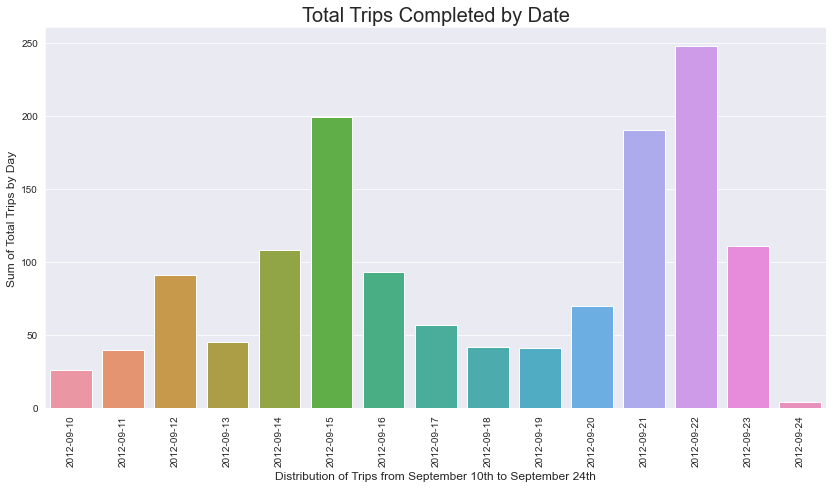

In [30]:
# setting plot style to dark grid
sns.set_style('darkgrid')

# defining font sizes for the plot elements
fontsize = 20
axfont = 12

# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 7))

# plotting the data 
sns.barplot(x = 'Date', y = 'Completed Trips', data = date_conversions, ax = ax)

# updating the plot title and size
plt.title('Total Trips Completed by Date', fontdict = {'fontsize'  : fontsize})

# updating the y-axis and size
plt.ylabel('Sum of Total Trips by Day', fontdict = {'fontsize' : axfont})

# updating the x-axis and font size
plt.xlabel('Distribution of Trips from September 10th to September 24th', fontdict = {'fontsize' : axfont})

# rotating the x-values 90 degrees
plt.xticks(rotation = 90)

# displaying the plot
plt.show();

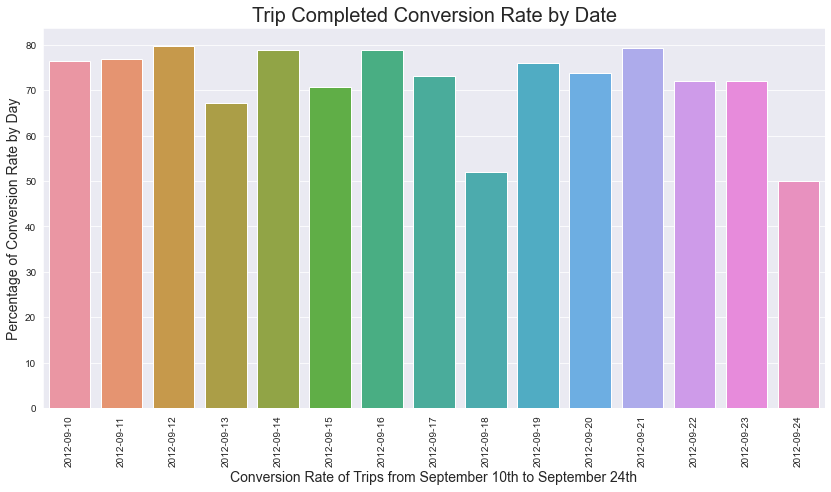

In [31]:
# setting plot style to darkgrid
sns.set_style('darkgrid')

# defining font sizes for plot elements
fontsize = 20
axfont = 14

# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 7))

# plotting the data 
sns.barplot(x = 'Date', y = 'conversion perc', data = date_conversions, ax = ax)

# updating the plot title and size
plt.title('Trip Completed Conversion Rate by Date', fontdict = {'fontsize'  : fontsize})

# updating the y-axis and size
plt.ylabel('Percentage of Conversion Rate by Day', fontdict = {'fontsize' : axfont})

# updating the x-axis and size
plt.xlabel('Conversion Rate of Trips from September 10th to September 24th', fontdict = {'fontsize' : axfont})

# rotating x-axis labels by 90 degrees
plt.xticks(rotation = 90)

# displaying the plot
plt.show();

## Section 1: Completed Trips

### Question 2: What was the highest number of completed trips within a 24 hour period?

#### Approach

+ Create a table grouped by the hour and sum all trips that occurred in that hour
+ Sort values by the hour ascending
+ Create a visual to digest the information in an easier format

In [32]:
# creating a table grouped by the date with the total sum of completed trips and requests - sorting values by Date ascending
hourly_trips = df.groupby('Time (Local)').agg({"Completed Trips" : "sum", "Requests" : "sum"}).reset_index().rename({"Time (Local)" : "Hour of Day"}, axis = 1)

# creating a new column calculating the conversion rate per hour
hourly_trips['conversion perc'] = round(hourly_trips['Completed Trips'] / hourly_trips['Requests'] * 100, 1)

# displaying the dataset
hourly_trips

,Hour of Day,Completed Trips,Requests,conversion perc
0,0,102,142,71.8
1,1,71,96,74.0
2,2,61,100,61.0
3,3,21,35,60.0
4,4,2,9,22.2
5,5,4,14,28.6
6,6,19,28,67.9
7,7,19,22,86.4
8,8,24,29,82.8
9,9,20,26,76.9


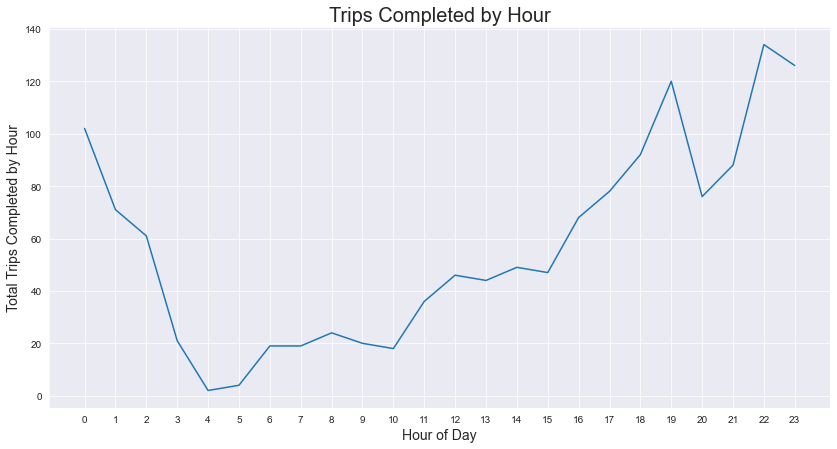

In [33]:
# setting plot style to darkgrid
sns.set_style('darkgrid')

# defining font sizes for plot elements
fontsize = 20
axfont = 14

# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 7))

# plotting the data 
sns.lineplot(x = 'Hour of Day', y = 'Completed Trips', data = hourly_trips, ax = ax)

# updating the plot title and size
plt.title('Trips Completed by Hour', fontdict = {'fontsize'  : fontsize})

# updating the y-axis and size
plt.ylabel('Total Trips Completed by Hour', fontdict = {'fontsize' : axfont})

# updating the x-axis and size
plt.xlabel('Hour of Day', fontdict = {'fontsize' : axfont})

# reseeting the x axis to show all hours not grouped
plt.xticks(ticks = hourly_trips['Hour of Day'])

# displaying the plot
plt.show();

## Section 1: Completed Trips

### Question 3: What is the weighted average ratio of completed trips per driver during the two week period?

#### What does weighted average mean?

+ Needs to account the total trip volume in each hour to determine the most accurate number for the whole day

#### Approach

+ Create a new column calculating the ratio of trip ratio per driver
+ We can do this by dividing completed trips / unique drivers
+ Filter out any instances where unique drivers equals 0 to avoid skewing in the data

In [34]:
# creating a new column calculating the trip ratio per unique driver
df['trip_ratio_per_driver'] = round(df['Completed Trips'] / df['Unique Drivers'], 2)

# displaying a random sample of the dataset
df.sample(n = 10, random_state = 42)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trip_ratio_per_driver
72,2012-09-13,7,10,1,1,1,4,0.25
110,2012-09-14,21,49,6,8,9,17,0.47
298,2012-09-22,17,41,2,8,10,20,0.40
108,2012-09-14,19,46,6,9,10,15,0.60
277,2012-09-21,20,63,8,14,21,28,0.50
42,2012-09-12,1,6,0,1,1,2,0.50
229,2012-09-19,20,19,1,2,2,12,0.17
283,2012-09-22,2,30,0,9,18,12,0.75
302,2012-09-22,21,53,3,15,19,21,0.71
140,2012-09-16,3,14,2,4,6,7,0.57


In [35]:
# filtering the dataset for the null values
df[df['trip_ratio_per_driver'] == df['trip_ratio_per_driver'].isnull()]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trip_ratio_per_driver
2,2012-09-10,9,8,3,0,0,14,0.0
3,2012-09-10,10,9,2,0,1,14,0.0
6,2012-09-10,13,9,1,0,0,9,0.0
7,2012-09-10,14,12,1,0,0,9,0.0
13,2012-09-10,20,11,1,0,0,5,0.0
15,2012-09-10,22,16,3,0,2,4,0.0
18,2012-09-11,1,3,2,0,1,3,0.0
19,2012-09-11,2,1,1,0,0,1,0.0
20,2012-09-11,3,1,1,0,0,1,0.0
21,2012-09-11,4,1,1,0,0,1,0.0


### What about instances where there were 0 Unique Drivers?

#### Next Steps

+ Remove the instances where no drivers were available and store it in a variable called filtered_data
+ It makes up 11.6% of the data
+ Calculate weighted average using the numpy average function

In [51]:
# looking for any potential null values in the dataset
round(len(df[df['Unique Drivers'] == 0.0])/len(df) * 100, 2)

11.61

In [45]:
# removing null values from the dataset
filtered_data = df[df['Unique Drivers'] > 0]

# displaying the filtered data
filtered_data 

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trip_ratio_per_driver
0,2012-09-10,7,5,0,2,2,9,0.22
1,2012-09-10,8,6,0,2,2,14,0.14
2,2012-09-10,9,8,3,0,0,14,0.00
3,2012-09-10,10,9,2,0,1,14,0.00
4,2012-09-10,11,11,1,4,4,11,0.36
...,...,...,...,...,...,...,...,...
327,2012-09-23,22,17,2,2,2,6,0.33
328,2012-09-23,23,9,3,3,3,3,1.00
329,2012-09-24,0,7,2,1,2,2,0.50
334,2012-09-24,5,4,2,1,1,3,0.33


In [53]:
# calculating the weighted average using the np.average function
# the weight will be the completed trips column
weighted_average = round(np.average(filtered_data['trip_ratio_per_driver'], weights = filtered_data['Completed Trips']), 2)
weighted_average

0.83